# MNIST 数据集
- 一组有美国高中生和人口调查局员工手写的 70 000 个数字的图片
- 每张图片都用其代表的数字标记
- 机器学习领域的 “hello world” ，广泛使用于分类算法


In [1]:
# sklearn 提供 datasets 功能来下载流行的数据集
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")

# # 加载本地下载好的 MNIST 数据集，MATLAB保存的数据文件 .mat
# import scipy.io as scio 
# mnist = scio.loadmat('./datasets/mnist-original.mat')

mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',


## sklearn 加载的数据集通常具有类似字典结构
- DESCR 键，描述数据集
- data 键，包含一个数组，每个实例为一行，每一特征为一列
- target 键，包含一个带有标记的数组


In [2]:
X, y = mnist["data"], mnist["target"]

X[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [5]:
# There should be more than one value in the resulting array.
# If not, then perhaps what happened is that you used fetch_openml() to download MNIST, 
# and it returns labels as strings so when you defined y_train_5 = (y_train == 5), 
# it results an array full of False. 

# A solution is to cast y_train to int8: y_train = y_train.astype(np.uint8) 
# (which is what I do in the notebook, just after loading the data).
import numpy as np

y = y.astype(np.uint8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

MNIST 数据集共有 7 万张图片，每张图片有 784 个特征

因为图片是 28 *28 = 784 像素，每个特征代表着一个像素的强度，从 0（白色）到 255（黑色）

查看数据集中的一个数字，随便选择一个实例的特征向量，将其重新形成一个 28 * 28 数组，然后使用 matplotlib 的 imshow 函数显示即可


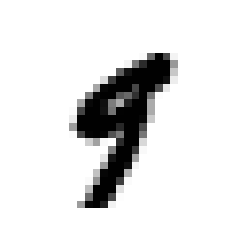

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
y[36000]

9

在开始研究数据集之前，首先应该创建一个测试集，并将其放在一边

对于 MNIST 数据集，实际上已经分成训练集（前6万）和测试集（最后1万）


In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


同样，需要将训练集数据洗牌
- 这样才能保证交叉验证时所有折叠都差不多（不希望某个折叠中丢一些数字）
- 算法对训练实例的顺序敏感，如果连续输入许多相似的实例，导致执行性能不佳
- 给数据进行洗牌，确保这样的情况不会发生


In [11]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


# 训练一个二元分类器
- 简化问题，只识别一个数字，如 9
- 那么检测数字 9 的检测器，就是一个二元分类器的例子
- 只能区分两个类别：9 和 非9


In [12]:
# 为此分类任务创建目标变量
# True for all 5s, False for all other digits
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)


接着挑选一个分类器进行训练
- 一个好的初始选择是随机梯度下降（SGD）分类器
- 使用 sklearn 的 SGDClassifier 类即可
- SGD 非常适合大型数据集


In [13]:
from sklearn.linear_model import SGDClassifier

# 由于 SGDClassifier 在训练时完全随机，希望得到复现的结果，需要设置参数 random_state=42
# 42 这个数字并无特殊含义，只是这个数字 42 是关乎 “ 关于生命、宇宙和一切的终极问题的答案 ” —— 《银河系搭车客指南》
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_9)

sgd_clf.predict([some_digit])

array([False])

# 性能考核
- 评估分类器比评估回归器要困难
- 使用交叉验证测量精度
- 实施交叉验证
    - 有时希望自定义（控制的更多），自行实施交叉验证，操作简单


In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_9):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_9[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_9[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    
# 每一折叠有 StratifiedKFold 执行分层抽样，其包含的各个类别的比例符合整体比例
# 每次迭代会创建一个分类器的副本，用训练集对这个副本进行训练，然后用测试集进行预测，最后计算正确预测的次数，输出正确预测的比率

# 现在用 cross_val_score() 函数评估 SGDClassifier 模型
# 采用 K-fold 交叉验证法，3 个折叠
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9115
0.9306
0.9202


array([0.9115, 0.9306, 0.9202])

三次折叠交叉的准确率（正确率的比例）看起来不错

看一看另一个分类器，将每一张图片分类成 非9


In [15]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# 查看这个模型的准确度
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.90635, 0.8958 , 0.9004 ])

准确率都超过 90% ，这是因为大约 10% 的图形数字是 9， 所以猜一张图片不是9, 90%的概率都是正确的

这种现象表明，准确率通常无法成为分类器的首要性能指标，特别是处理 偏斜数据集（skewed dataset）的时候（即某些类比其他类更为频繁）


# 混淆矩阵
- 评估分类器性能的更好方法是混淆矩阵
- 总体思路就是统计A类别实例被分成B类别的次数
- 例如：想知道分类器将数字3和数字5混淆多少次，只需要通过混淆矩阵的第5行第3列来查看
- 计算混淆矩阵，需要先有一组预测才能将其与实际目标进行比较
- 当然可以使用测试集进行预测，但最好不用，可以用 cross_val_predict() 函数的结果代替


In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)


与 cross_val_score() 函数一样，cross_val_predict 函数同样执行 K-fold 交叉验证，但返回的不是评估分数，而是每个折叠的预测。

这意味对于每一个实例都可以得到一个干净的预测（“干净”的意思是模型预测时使用的数据，在其训练期间从未见到过）

可以使用 confusion_matrix() 函数来获取混淆矩阵，只需要给出目标类别（y_train_9）和预测类别（y_train_pred）


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)

array([[50858,  3193],
       [ 1561,  4388]], dtype=int64)

混淆矩阵中的行表示实际类别，列表示预测类别。

本例中第一行表示所有 “非9”（负类）的图片：51608张被正确的分为“非9”类别（真负类），2443张被错误的分成“9”类别（假正类）

第二行表示所有“9”类别（正类）图片：1653张被错误分成“非9”类别（假负类），4296张被正确的分成“9”类别（真正类）

一个完美的分类器只有 真正类和真负类，故此其混淆矩阵只有正对角线（左上右下）有非零值


In [21]:
y_train_perfect_predictions = y_train_9
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

混淆矩阵表示的信息量很大，有时需要指标简洁

正类预测的准确率是一个不错的指标，也被称之为分类器的精度（precision）

Precision = TP / ( TP + FP )

其中 TP 是真正类的数量，FP 是假正类的数量

一个单独的正类预测，并确保其正确，得到完美精度 精度 = 1 / 1 = 100%

当时这个完美精度没有任何意义，因为分类器会忽略这个正类实例之外的所有内容

因此精度通常与另一个指标一起使用，召回率（recall），也称之为灵敏度（sensitivity）或者真正类率（TPR）：是分类器正确检测到正类实例的比例

Recall = TP / ( TP + FP )

其中 FP 是假负类的数量

sklearn 提供了计算多种分类器指标的函数，精度和召回率就是其中

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_9, y_train_pred)

0.5788154597018863

In [25]:
recall_score(y_train_9, y_train_pred)

0.7376029584804169

可以将 精度 和 召回率 组合成为一个单一的指标，称之为 F1分数

F1 分数是精度和召回率的谐波平均值

F1 = 2 / ( 1 / precison + 1 / recall ) = 2 * ( (precision * recall) / (precision + recall) ) = TP / ( TP + (FN + FP ) / 2 )

正常的平均值平等对待所有值，而谐波平均值会给予较低的值更高的权重

因此，只有当召回率recall 和精度precision 都很高时，分类器才能得到较高的 F1分数


In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.6486326681448633

In [ ]:
F1 分数对于那些具有相近的精度和召回率的分类器更为有利

这不一定符合期望，某些情况下只关心精度，某些情况下只关心召回率

鱼和熊掌不可兼得，不能同时增加精度并减少召回率，反之亦然，这称之为 精度/召回率权衡
